In [11]:
import matplotlib.pyplot as plt
%matplotlib widget
%precision %.2f
from numpy import pi, sin, arange, ones, linspace
from numpy.typing import ArrayLike
from IPython.display import Markdown as md
degrees = pi/180
g = 196133/20000

# Homework 3
Markus Kreitzer
21 September 2022

## Problem 1
Given:

In [12]:
theta = 20 * degrees
mass = 3000 # kg
Jm = 0.3 # kg-m^2
J_drum = 45 # kg-m^2
drum_diameter = 0.5 # m
a = 1/6.25 # gear coupling ratio (ω_drum / ω_m)
v_belt = 2 # m/s
E_mass = (0.5 * mass * v_belt ** 2 )*sin(theta)

a. Calculate the motor speed $\omega_m$

In [13]:

def ω_drum(velocity: ArrayLike,diameter:ArrayLike):
    return velocity/(diameter/2)
def ω_motor(ω, a):
    return ω/a

print(f'ω_motor = {ω_motor(ω_drum(v_belt, drum_diameter),a)} rad/s')
print(f'ω_drum = {ω_drum(v_belt, drum_diameter)} rad/s')

ω_motor = 50.0 rad/s
ω_drum = 8.0 rad/s


b. Calculate the total inertia $J_{tot}$ referred to the motor.

In [14]:
J_total = Jm + a**2 * 2 * J_drum
print(f'J_total = {J_total} kg-m^2')

J_total = 2.604 kg-m^2


c. Calculate the motor torque $T_{m,0}$ at standstill.

In [15]:
Fd = mass*g*sin(theta)
Td = Fd*(drum_diameter/2)
print(f'Drum torque  Td = {Td:0.2f} Nm')
T_motor = Td * a
print(f'Motor torque Tm = {T_motor:0.2f} Nm')

Drum torque  Td = 2515.55 Nm
Motor torque Tm = 402.49 Nm


## Problem 2

In [16]:
Tm_new = 502.5 # Nm
vf = 2 # m/s
Wd = ω_drum(vf, drum_diameter)
Wm = ω_motor(Wd, a)
print(f'Motor rotational speed Wm(2) = {Wm:0.2f} rad/s')
Pm = Tm_new * Wm
print(f'Mechanical Power Pm = {Pm/1000:0.2f} kW')

Motor rotational speed Wm(2) = 50.00 rad/s
Mechanical Power Pm = 25.12 kW


b. Calculate the time it takes to reach point B and distance between A and B

In [17]:
dT = Tm_new - T_motor
t_b = (Wm * J_total ) / dT
print(f'time: {t_b*1000:0.3f} ms')
d_b = v_belt*t_b
print(f'distance: {d_b:0.2f} m')

time: 1301.852 ms
distance: 2.60 m


c. Calculate, $T_{mBC}$ and $t_{c}$ if $BC = 10 m$
Since the system has no other losses, at the maintained velocity of $2 m/s$ the motor torque returns to the initial torque.

In [18]:
T_motor = Td * a
d_BC = 10
print(f'Motor torque Tm = {T_motor:0.2f} Nm')
t_c = d_BC/v_belt
print(f't_c = {t_c:0.2f} s')

Motor torque Tm = 402.49 Nm
t_c = 5.00 s


d. From point C, compute the torque to slow down in 3s.
$$
\begin{align}
\omega_m(t) &= \frac{1}{J_{tot}} {\int}_{0}^{t_f} (T_m - T_{CD})\ dt \\
\omega_m(t) \cdot J_{tot} &= {\int}_{0}^{t_f} (T_m - T_{CD})\ dt \\
\omega_m(t) \cdot J_{tot} &= (T_m - T_{CD})(t_f-0) \\
\frac{\omega_m(t) \cdot J_{tot}}{t_f} &= (T_m - T_{CD})\\
T_{CD} &= T_{m} - \frac{\omega_m(t) \cdot J_{tot}}{t_f}\\
T_m &= 402.49 - \frac{50 \cdot 2.6}{3}\\
T_m &= 359.09 \ N\cdot m \\
\end{align}
$$

In [19]:
t_CD = 3
T_CD = T_motor - (Wm * J_total / t_CD)
print(f'T_CD = {T_CD:0.2f} Nm')

T_CD = 359.09 Nm


e. At  point $D$ to maintain the mass on the ramp, you will need to maintain the initial torque of $402.49$ Nm.

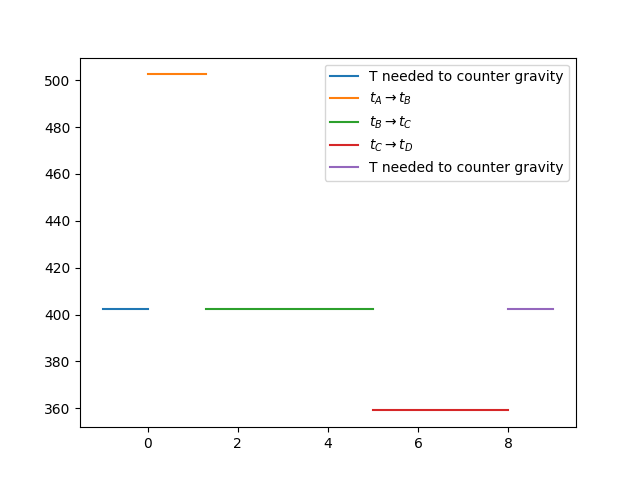

In [20]:
x0 = linspace(-1,0)
y0 = T_motor*ones(x0.shape)
x1 = linspace(0,t_b)
y1 = Tm_new*ones(x1.shape)
x2 = linspace(t_b,t_c)
y2 = T_motor*ones(x2.shape)
x3 = linspace(t_c, t_c+t_CD)
y3 = T_CD*ones(x3.shape)
xf = linspace(t_c+t_CD, t_c+t_CD+1)
yf = T_motor*ones(xf.shape)

plt.plot(x0,y0)
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.plot(xf,yf)
plt.legend([
    'T needed to counter gravity',
    '$t_A \\rightarrow t_B$',
    '$t_B \\rightarrow t_C$',
    '$t_C \\rightarrow t_D$',
    'T needed to counter gravity',
])
plt.show()

## Problem 3
a)

Case 1

Case 2

b) False